In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier, LogisticRegression
pd.options.display.expand_frame_repr = True

$\theta = (X^T X)^{-1}X^T y$

derived by zeroing gradients of mean squared error

QA

* why transform features non-linearly ? to deal with non-linearly separable cases

In [19]:
df = pd.read_csv('amazon-fine-foods/Reviews.csv')

In [20]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [84]:
X = df['Text']
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [87]:
tf = TfidfVectorizer().fit(X_train)

In [149]:
#reg = LogisticRegression(verbose=1)
reg = LinearRegression()
reg.fit(tf.transform(X_train), y_train)

KeyboardInterrupt: 

In [103]:
(reg.predict(tf.transform(X_test)) == y_test).mean()

0.74454573281215364

In [115]:
len(tf.get_feature_names())

89497

In [116]:
plt.bar()

(89497,)

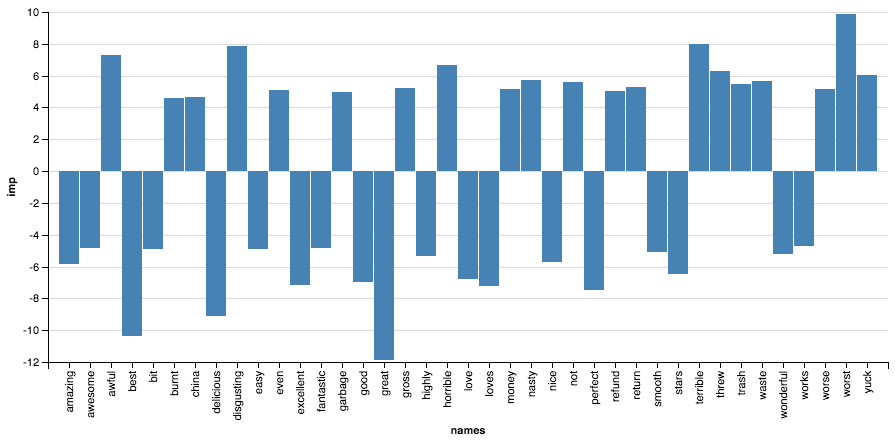

In [146]:
from altair import Chart, load_dataset
df = {'names': tf.get_feature_names(), 'imp': reg.coef_[0]}
df = pd.DataFrame(df)
df = df.sort_values(by='imp', ascending=False)
nb = 20
df = pd.concat((df.iloc[0:nb], df.iloc[-1:-nb:-1]))
Chart(df).mark_bar().encode(x='names', y='imp')

In [133]:
Chart(df).encode.__docs__

AttributeError: 'function' object has no attribute '__docs__'

In [ ]:
Chart(df).encode